In [3]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load our smaller dataset
df = pd.read_csv('vehicles_small.csv')
print("✅ Small dataset loaded successfully!")

# --- Step 2: Inspect the Data ---
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset information and missing values:")
df.info()

# --- Step 3: Basic Data Summary ---
print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())


✅ Small dataset loaded successfully!

First 5 rows of the dataset:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN



Dataset information and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96252 entries, 0 to 96251
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            96252 non-null  int64  
 1   url           96252 non-null  object 
 2   region        96252 non-null  object 
 3   region_url    96252 non-null  object 
 4   price         96252 non-null  int64  
 5   year          95867 non-null  float64
 6   manufacturer  92023 non-null  object 
 7   model         95025 non-null  object 
 8   condition     59369 non-null  object 
 9   cylinders     57520 non-null  object 
 10  fuel          95683 non-null  object 
 11  odometer      94797 non-null  float64
 12  title_status  94049 non-null  object 
 13  transmission  95783 non-null  object 
 14  VIN           61628 non-null  object 
 15  drive         67019 non-null  object 
 16  size          26475 non-null  object 
 17  type          77308 non-null

,id,price,year,odometer,county,lat,long
count,9.625200e+04,9.625200e+04,95867.000000,9.479700e+04,0.0,95739.000000,95739.000000
mean,7.312018e+09,1.146899e+05,2010.900049,9.662113e+04,NaN,37.081567,-108.612486
std,4.685084e+06,1.500159e+07,10.114731,2.341379e+05,NaN,5.891636,17.957075
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-158.599600
25%,7.308872e+09,5.999000e+03,2008.000000,3.665700e+04,NaN,33.786500,-120.938695
50%,7.313569e+09,1.399500e+04,2013.000000,8.264000e+04,NaN,36.667700,-117.085600
75%,7.315723e+09,2.599000e+04,2017.000000,1.300000e+05,NaN,38.917060,-94.138303
max,7.316950e+09,3.024942e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502



Missing values per column:
id                  0
url                 0
region              0
region_url          0
price               0
year              385
manufacturer     4229
model            1227
condition       36883
cylinders       38732
fuel              569
odometer         1455
title_status     2203
transmission      469
VIN             34624
drive           29233
size            69777
type            18944
paint_color     28724
image_url          38
description        39
county          96252
state               0
lat               513
long              513
posting_date       38
dtype: int64


In [5]:
# --- Step 2: Data Cleaning and Preprocessing ---

print("Original shape of the dataset:", df.shape)

# 1. Drop columns that are not useful for predicting price.
# This includes IDs, links, descriptions, and location data that is too specific.
columns_to_drop = ['id', 'url', 'region', 'region_url', 'vin', 'image_url', 
                   'description', 'county', 'state', 'lat', 'long', 'posting_date']

# We use axis=1 to specify we are dropping columns.
# The 'errors='ignore'' part prevents an error if a column doesn't exist.
df_cleaned = df.drop(columns=columns_to_drop, axis=1, errors='ignore')

# 2. Remove rows that still have missing values in important columns.
# For a first model, it's easiest to work only with complete data.
df_cleaned = df_cleaned.dropna()

# 3. Remove outliers and absurd values.
# We'll keep only cars with a reasonable price, mileage, and age.
df_cleaned = df_cleaned[(df_cleaned['price'] > 1000) & (df_cleaned['price'] < 100000)]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 500000]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]

# --- Let's see the result of our cleaning ---
print("\nShape of the dataset after cleaning:", df_cleaned.shape)
print("\nFirst 5 rows of the CLEANED dataset:")
display(df_cleaned.head())

Original shape of the dataset: (96252, 26)

Shape of the dataset after cleaning: (6402, 15)

First 5 rows of the CLEANED dataset:


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color
215,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue
219,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white
268,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white
337,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white
346,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red


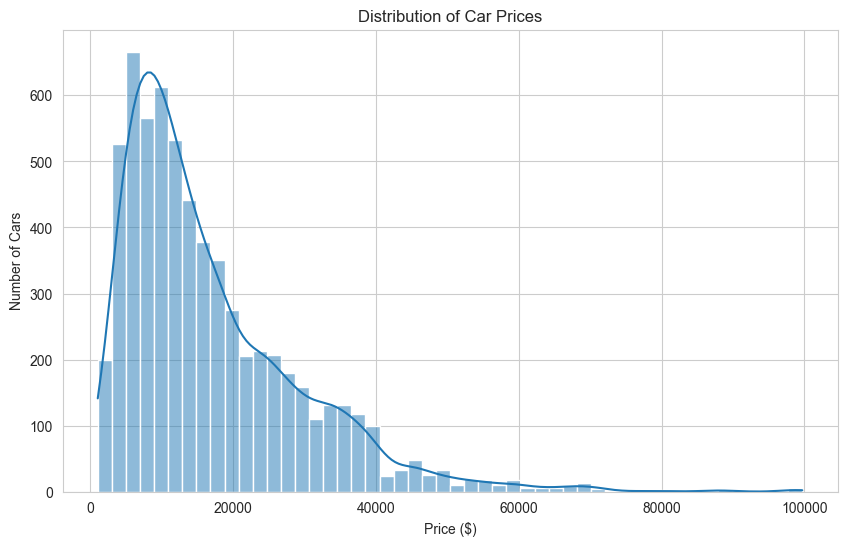

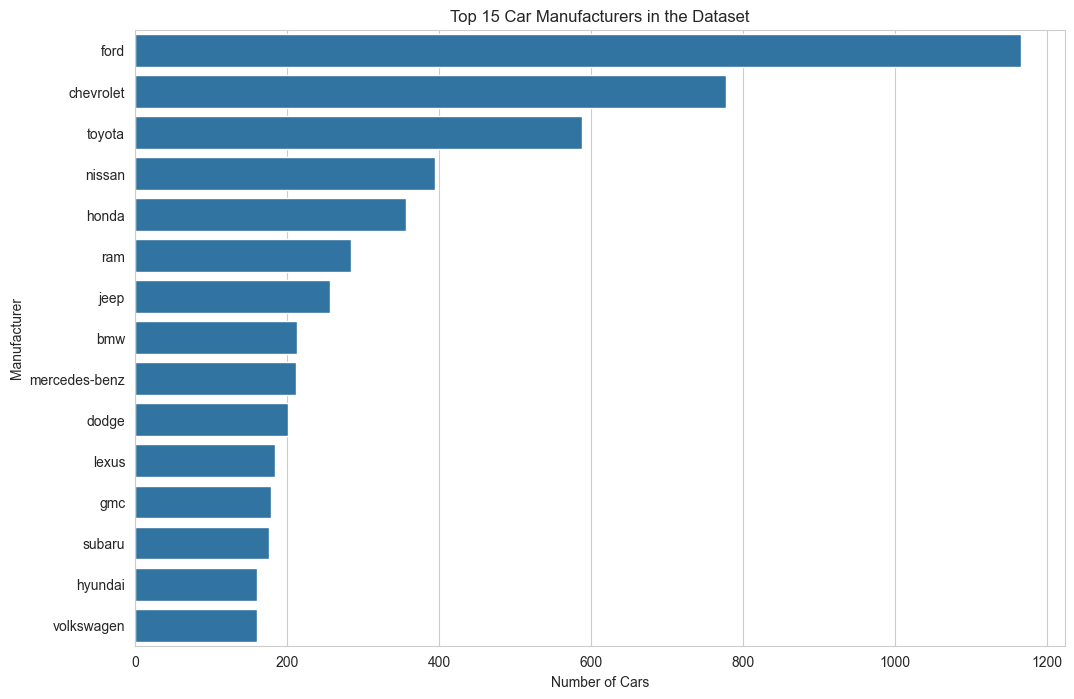

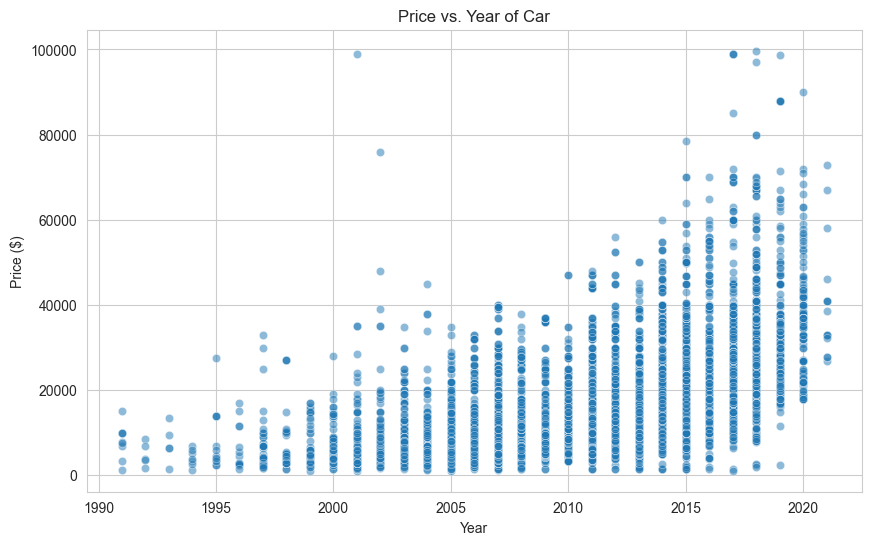

In [6]:
# --- Step 3: Exploratory Data Analysis (EDA) ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set_style('whitegrid')

# 1. Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Cars')
plt.show()

# 2. Plot the count of top 15 car manufacturers
plt.figure(figsize=(12, 8))
sns.countplot(y='manufacturer', data=df_cleaned, order=df_cleaned['manufacturer'].value_counts().iloc[:15].index)
plt.title('Top 15 Car Manufacturers in the Dataset')
plt.xlabel('Number of Cars')
plt.ylabel('Manufacturer')
plt.show()

# 3. Plot the relationship between year and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs. Year of Car')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

In [7]:
# --- Step 4: Feature Engineering and Data Splitting ---
from sklearn.model_selection import train_test_split

# 1. Select the features (X) and the target variable (y)
# We choose the columns we think will help predict the price.
features = ['year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'type']
X = df_cleaned[features]
y = df_cleaned['price']

# 2. Convert categorical columns into numerical format using one-hot encoding
# A model can't understand text like "ford" or "good", so we create new columns of 0s and 1s.
X_processed = pd.get_dummies(X, columns=['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'type'], drop_first=True)

# 3. Split the data into training and testing sets
# We'll train our model on 80% of the data and test its performance on the remaining 20%.
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# --- Let's check the result ---
print("Shape of our training features:", X_train.shape)
print("\nA preview of the final features for the model:")
display(X_train.head())

Shape of our training features: (5121, 74)

A preview of the final features for the model:


,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
7152,2019.0,21700.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23228,2015.0,81618.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
85765,2016.0,168570.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
56425,2021.0,2626.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
76943,2010.0,180554.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# --- Step 5: Train and Evaluate the Model ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize the Model
# We are creating an instance of the Linear Regression model.
model = LinearRegression()

# 2. Train the Model
# The .fit() method is the "learning" step. 
# It finds the patterns in your training data (X_train, y_train).
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

# 3. Make Predictions on the Test Data
# Now we use our trained model to predict prices for the test set.
predictions = model.predict(X_test)

# 4. Evaluate the Model's Performance
# We'll compare the model's predictions to the actual prices.
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"R-squared (R²): {r2:.2f}")

Training the model...
Model training complete!

--- Model Evaluation Results ---
Mean Absolute Error (MAE): $4,787.41
Mean Squared Error (MSE): $52,198,071.44
R-squared (R²): 0.70


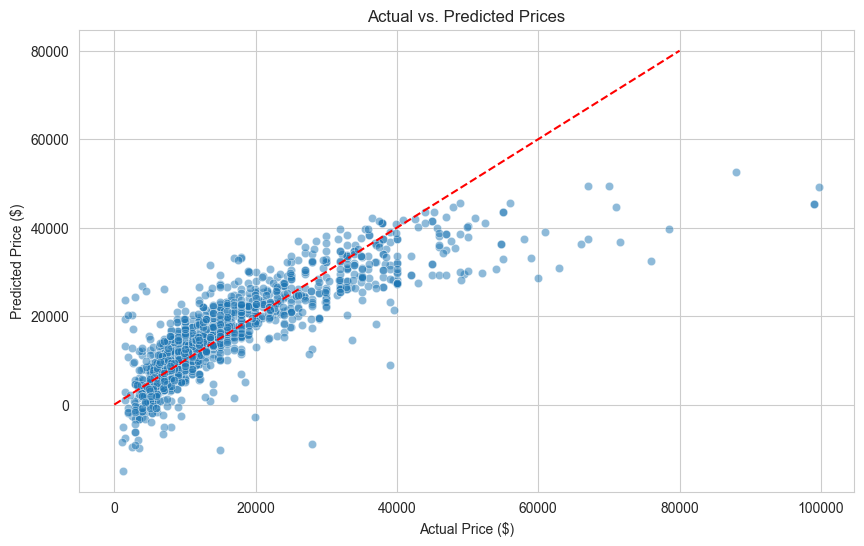

In [9]:
# --- Step 6: Visualize the Predictions ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create a scatter plot with actual prices on the x-axis and predicted prices on the y-axis
sns.scatterplot(x=y_test, y=predictions, alpha=0.5)

# Add a red dashed line representing a perfect prediction (where actual price = predicted price)
plt.plot([0, 80000], [0, 80000], 'r--')

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.show()

In [10]:
# --- Step 7: Train a More Advanced Model (Random Forest) ---
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Random Forest model
# n_estimators=100 means we'll build 100 decision trees.
# random_state=42 ensures we get the same result every time we run it.
# n_jobs=-1 tells the model to use all available computer cores to speed up training.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model on the same data
print("Training the Random Forest model... (This may take a minute)")
rf_model.fit(X_train, y_train)
print("Model training complete!")

# 3. Make new predictions
rf_predictions = rf_model.predict(X_test)

# 4. Evaluate the new model's performance
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\n--- Random Forest Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${rf_mae:,.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")

print("\n--- Comparison ---")
print(f"Linear Regression R²: {r2:.2f}")
print(f"Random Forest R²:     {rf_r2:.2f}")

Training the Random Forest model... (This may take a minute)
Model training complete!

--- Random Forest Model Evaluation Results ---
Mean Absolute Error (MAE): $2,767.56
R-squared (R²): 0.85

--- Comparison ---
Linear Regression R²: 0.70
Random Forest R²:     0.85


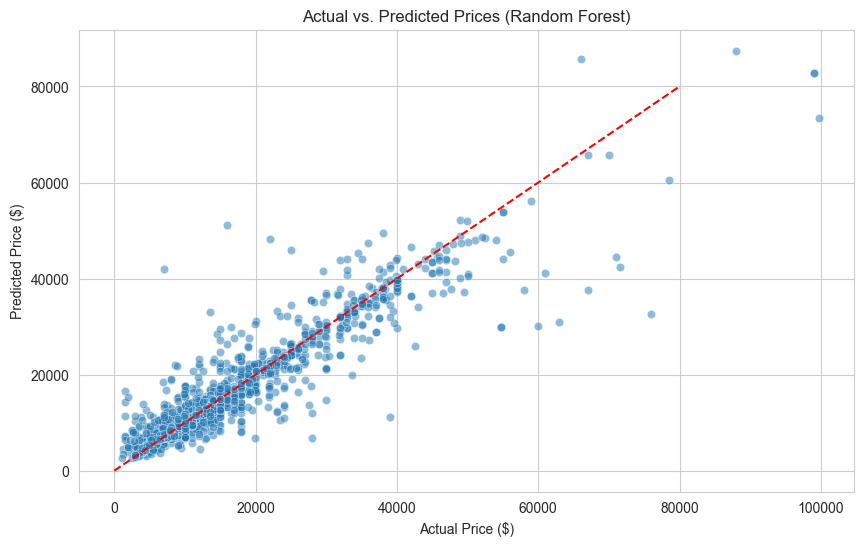

In [11]:
# --- Step 8: Visualize the Random Forest Predictions ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_predictions, alpha=0.5)
plt.plot([0, 80000], [0, 80000], 'r--')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.show()

In [12]:
# --- Step 9: Feature Engineering for Classification ---

# Use our trained Random Forest model to predict prices for the ENTIRE clean dataset
# Note: We are using X_processed, which is the complete dataset before the train/test split.
all_predictions = rf_model.predict(X_processed)

# Add the predicted prices and the difference to our df_cleaned DataFrame
df_cleaned['predicted_price'] = all_predictions
df_cleaned['price_difference'] = df_cleaned['predicted_price'] - df_cleaned['price']

# Define a "Good Deal" as a car priced at least $3,000 below its predicted value
# We create a new target column, 'is_good_deal', with 1 for True and 0 for False.
df_cleaned['is_good_deal'] = (df_cleaned['price_difference'] >= 3000).astype(int)

print("Number of 'Good Deals' found in the dataset:")
print(df_cleaned['is_good_deal'].value_counts())

# --- Prepare data for the classification model ---

# Our features (X) are the same processed features as before
X_clf = X_processed

# Our target (y) is the new 'is_good_deal' column we just created
y_clf = df_cleaned['is_good_deal']

# Split the data into training and testing sets for the classification task
# We use 'stratify=y_clf' to ensure the train and test sets have a similar percentage of "Good Deals"
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

print("\nClassification data is now ready for modeling!")

Number of 'Good Deals' found in the dataset:
is_good_deal
0    6066
1     336
Name: count, dtype: int64

Classification data is now ready for modeling!


In [13]:
# --- Step 10: Train and Evaluate a Classification Model ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Initialize and train the Logistic Regression model
# We set class_weight='balanced' to help the model deal with the fact that there are
# far fewer "Good Deals" than "Not Good Deals".
clf_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

print("Training the classification model...")
clf_model.fit(X_train_clf, y_train_clf)
print("Model training complete!")

# 2. Make predictions on the test set
clf_predictions = clf_model.predict(X_test_clf)

# 3. Evaluate the classifier's performance
print("\n--- Classification Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test_clf, clf_predictions):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_clf, clf_predictions))
print("\nClassification Report:")
print(classification_report(y_test_clf, clf_predictions))

Training the classification model...


C:\Users\raksh\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training complete!

--- Classification Model Evaluation ---
Accuracy Score: 0.67

Confusion Matrix:
[[817 397]
 [ 22  45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80      1214
           1       0.10      0.67      0.18        67

    accuracy                           0.67      1281
   macro avg       0.54      0.67      0.49      1281
weighted avg       0.93      0.67      0.76      1281



In [14]:
# --- Step 11: Scaling Data and Retraining the Classifier ---
from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)

# 3. Re-initialize and retrain the model on the SCALED data
clf_model_scaled = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
print("Training the model on scaled data...")
clf_model_scaled.fit(X_train_scaled, y_train_clf)
print("Model training complete!")

# 4. Make new predictions and evaluate
clf_predictions_scaled = clf_model_scaled.predict(X_test_scaled)

print("\n--- Evaluation on SCALED Data ---")
print(classification_report(y_test_clf, clf_predictions_scaled))

Training the model on scaled data...
Model training complete!

--- Evaluation on SCALED Data ---
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1214
           1       0.10      0.64      0.17        67

    accuracy                           0.68      1281
   macro avg       0.54      0.66      0.49      1281
weighted avg       0.93      0.68      0.77      1281



In [15]:
# --- Step 12: Train an Advanced Classifier (Random Forest) ---
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest Classifier
# We use the same key parameters as our regression version.
# class_weight='balanced' is especially important for imbalanced problems like this.
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

# 2. Train the model on the SCALED data
print("Training the Random Forest Classifier... (This may take a minute)")
rfc_model.fit(X_train_scaled, y_train_clf)
print("Model training complete!")

# 3. Make new predictions and evaluate
rfc_predictions = rfc_model.predict(X_test_scaled)

print("\n--- Random Forest Classifier Evaluation ---")
print(classification_report(y_test_clf, rfc_predictions))

Training the Random Forest Classifier... (This may take a minute)
Model training complete!

--- Random Forest Classifier Evaluation ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1214
           1       0.69      0.13      0.23        67

    accuracy                           0.95      1281
   macro avg       0.82      0.57      0.60      1281
weighted avg       0.94      0.95      0.94      1281



In [16]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'car_price_predictor_model.joblib')

# Also save the scaler, we'll need it for new predictions
joblib.dump(scaler, 'scaler.joblib')

# And save the list of columns the model was trained on
joblib.dump(X_train.columns, 'model_columns.joblib')

print("Model, scaler, and columns saved successfully!")

Model, scaler, and columns saved successfully!


In [17]:
# --- Get Unique Values for Dropdown Menus ---

print("Unique Manufacturers:")
print(sorted(df_cleaned['manufacturer'].unique()))

print("\nUnique Conditions:")
print(sorted(df_cleaned['condition'].unique()))

print("\nUnique Cylinder Types:")
print(sorted(df_cleaned['cylinders'].unique()))

print("\nUnique Fuel Types:")
print(sorted(df_cleaned['fuel'].unique()))

print("\nUnique Title Statuses:")
print(sorted(df_cleaned['title_status'].unique()))

print("\nUnique Transmissions:")
print(sorted(df_cleaned['transmission'].unique()))

print("\nUnique Car Types:")
print(sorted(df_cleaned['type'].unique()))

Unique Manufacturers:
['acura', 'alfa-romeo', 'aston-martin', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari', 'fiat', 'ford', 'gmc', 'harley-davidson', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'land rover', 'lexus', 'lincoln', 'mazda', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan', 'pontiac', 'porsche', 'ram', 'rover', 'saturn', 'subaru', 'tesla', 'toyota', 'volkswagen', 'volvo']

Unique Conditions:
['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

Unique Cylinder Types:
['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']

Unique Fuel Types:
['diesel', 'electric', 'gas', 'hybrid', 'other']

Unique Title Statuses:
['clean', 'lien', 'rebuilt', 'salvage']

Unique Transmissions:
['automatic', 'manual', 'other']

Unique Car Types:
['SUV', 'bus', 'convertible', 'coupe', 'hatchback', 'mini-van', 'offroad', 'other', 'pickup', 'sedan', 'truck', 'van', 'wagon'